In [93]:
import pandas as pd
import numpy as np
import scipy.stats as probplot
import pylab
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

In [94]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
#Author Aindril kar (kernal_name= kernel5ee8529b4e) (Kaggle Account:    ADRkr_7      )
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cardiovascular-disease-dataset/cardio_train.csv


In [95]:
df=pd.read_csv(r"/kaggle/input/cardiovascular-disease-dataset/cardio_train.csv",sep=";")

# Data Analysis & Preprocessing

In [96]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [98]:
df.shape

(70000, 13)

In [99]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [100]:
for i in df.columns:
    print(i)
    print(df[i].describe())

id
count    70000.000000
mean     49972.419900
std      28851.302323
min          0.000000
25%      25006.750000
50%      50001.500000
75%      74889.250000
max      99999.000000
Name: id, dtype: float64
age
count    70000.000000
mean     19468.865814
std       2467.251667
min      10798.000000
25%      17664.000000
50%      19703.000000
75%      21327.000000
max      23713.000000
Name: age, dtype: float64
gender
count    70000.000000
mean         1.349571
std          0.476838
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: gender, dtype: float64
height
count    70000.000000
mean       164.359229
std          8.210126
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64
weight
count    70000.000000
mean        74.205690
std         14.395757
min         10.000000
25%         65.000000
50%         72.000000
75%         82.000000
max  

id


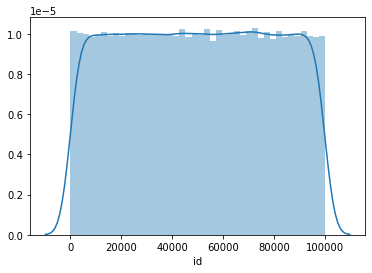

age


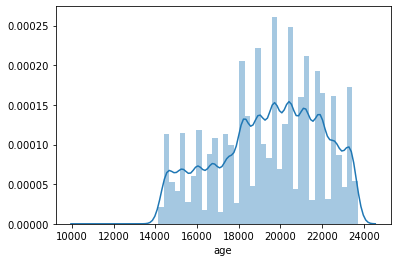

gender


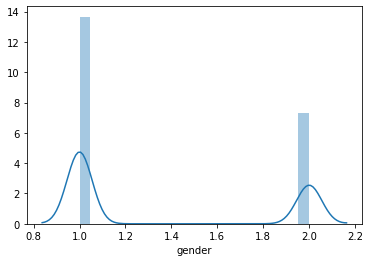

height


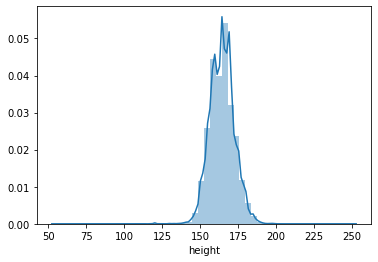

weight


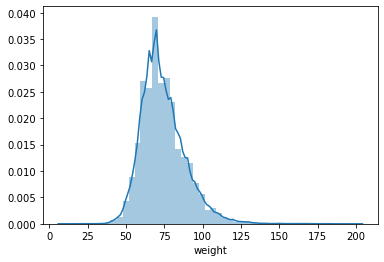

ap_hi


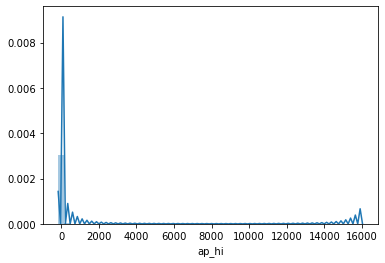

ap_lo


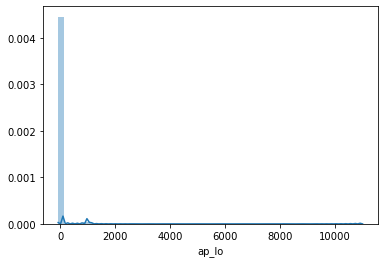

cholesterol


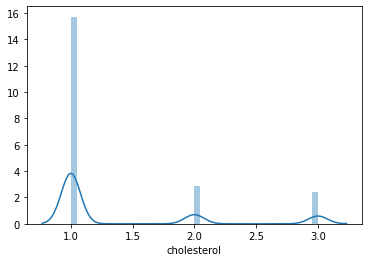

gluc


RuntimeError: Selected KDE bandwidth is 0. Cannot estimate density.

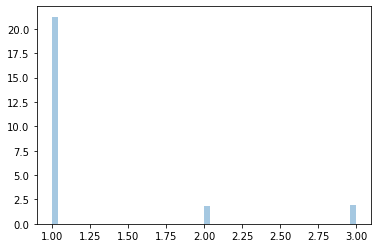

In [101]:
for i in df.columns:
    print(i)
    sns.distplot(df[i])
    plt.show()

In [102]:
(df["ap_hi"]<0).sum()

7

In [103]:
'''but no systolic pressure can be negative . Assuming it be a recording error I have imputed these values to its absolute values'''

'but no systolic pressure can be negative . Assuming it be a recording error I have imputed these values to its absolute values'

In [104]:
df["ap_lo"]=abs(df["ap_lo"])

In [105]:
'''Similary it was found that the diastolic presssure column also had some values that was negative and hence the absolute value of the column was found and replaced '''

'Similary it was found that the diastolic presssure column also had some values that was negative and hence the absolute value of the column was found and replaced '

In [106]:
df["ap_hi"]=abs(df["ap_hi"])

In [107]:
'''To check whether the classs is Balanced or not......'''

'To check whether the classs is Balanced or not......'

In [108]:
print("No of class 0 Records/Observatios------> {o} ".format(o=(df["cardio"]==0).sum()))

No of class 0 Records/Observatios------> 35021 


In [109]:
print("No of class 1 Records/Observatios------> {o} ".format(o=(df["cardio"]==1).sum()))

No of class 1 Records/Observatios------> 34979 


In [110]:
'''No of Class 1 Observation is nearly the same as Class 0'''

'No of Class 1 Observation is nearly the same as Class 0'

In [111]:
'''To check Whether the systolic pressure column values are  consistent....Aim is to check the veracity of the data '''

'To check Whether the systolic pressure column values are  consistent....Aim is to check the veracity of the data '

In [112]:
'''After going through the desciption of each column generated earlier it was found that the maximum value for column ap_hi was 11000 ...next to impossible right. ' '''

"After going through the desciption of each column generated earlier it was found that the maximum value for column ap_hi was 11000 ...next to impossible right. ' "

In [113]:
'''Dropping the records which were found to have an abnormal value for column ap_hi(Taking a threshold value 500 as the permissible limit..... I know its still very high '''

'Dropping the records which were found to have an abnormal value for column ap_hi(Taking a threshold value 500 as the permissible limit..... I know its still very high '

In [114]:
print("No of record with ap_hi value greater than 500-------> {o}".format(o=(df["ap_hi"]>500).sum()))

No of record with ap_hi value greater than 500-------> 38


In [115]:
#storing the indexes of these records
ind=df[(df["ap_hi"]>500)].index

In [116]:
#dropping these record
df.drop(index=ind,inplace=True)

In [117]:
'''The above process was again fowlled  for column ap_lo as is had adnormal values as well'''

'The above process was again fowlled  for column ap_lo as is had adnormal values as well'

In [118]:
#storing the index of the records
ind1=df[df["ap_lo"]>500].index

In [119]:
#dropping these records
df.drop(index=ind1,inplace=True)

In [120]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [121]:
#finding the new shape of the data
df.shape

(69009, 13)

# To check that the data follows a Normal Distribution curve

id


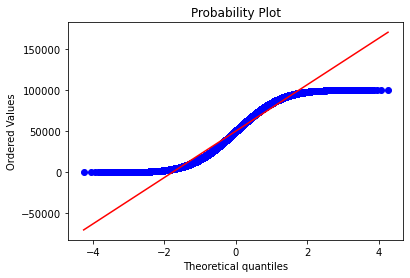

age


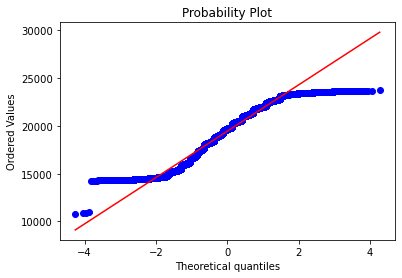

gender


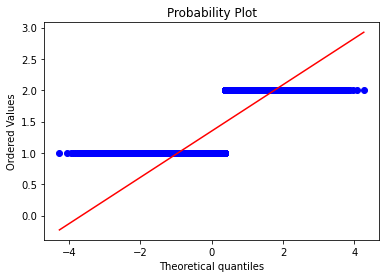

height


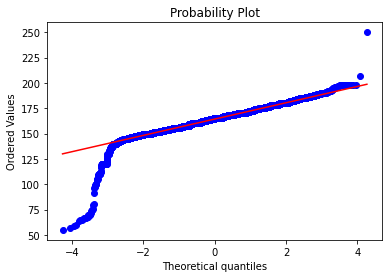

weight


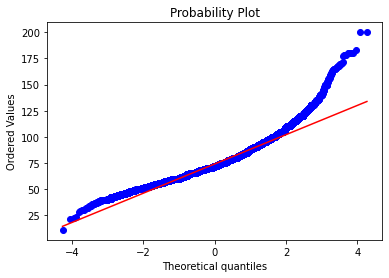

ap_hi


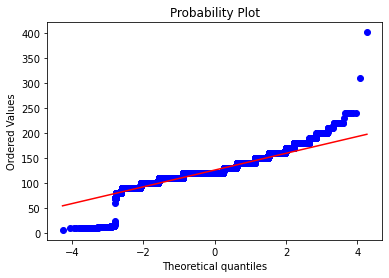

ap_lo


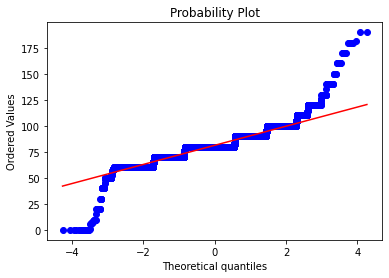

cholesterol


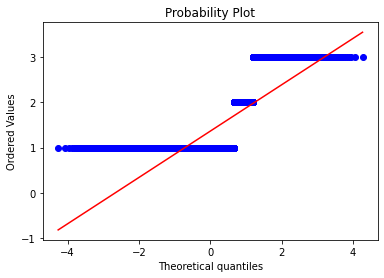

gluc


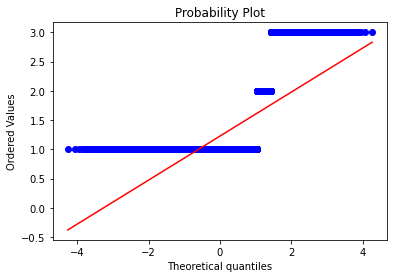

smoke


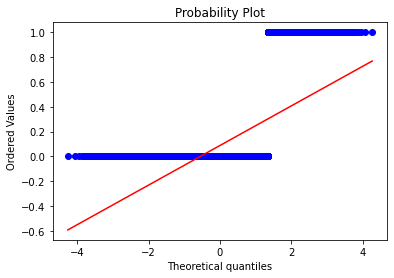

alco


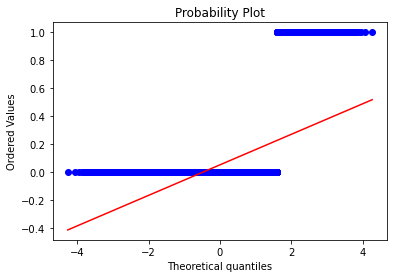

active


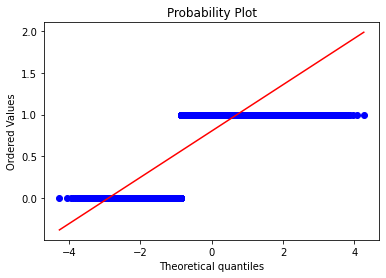

cardio


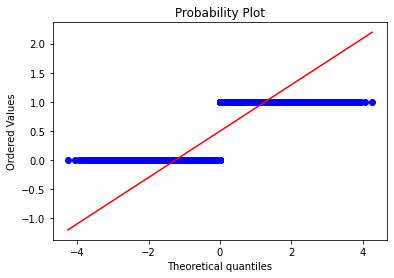

In [122]:
#Using the probplot to find the distribution of the data ie.if the data is not skewed ie follows the normal distribution the points(blue) will trace the red line as shown in these figures.....  
for i in df.columns:
    print(i)
    scipy.stats.probplot(df[i],dist="norm",plot=pylab)
    #sns.distplot(df[i])
    plt.show()

In [123]:
'''After alalyzing the distribution of all the columns it was found that column:"age","height","weight","ap_hi","ap_lo" did not follow the normal distribution ....and for the ordered catagorical varibles like "active","alco","smoke","gluc","cholesterol" no normalization needed becaude we need to reatinthe ordered relation '''

'After alalyzing the distribution of all the columns it was found that column:"age","height","weight","ap_hi","ap_lo" did not follow the normal distribution ....and for the ordered catagorical varibles like "active","alco","smoke","gluc","cholesterol" no normalization needed becaude we need to reatinthe ordered relation '

In [124]:
l=["age","height","weight","ap_hi","ap_lo"]

age


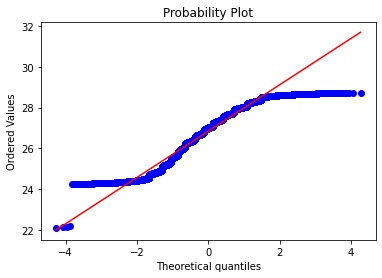

height


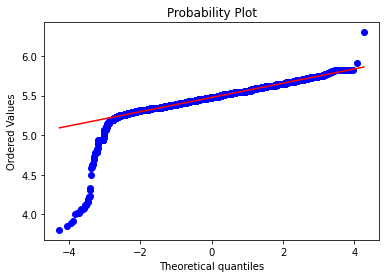

weight


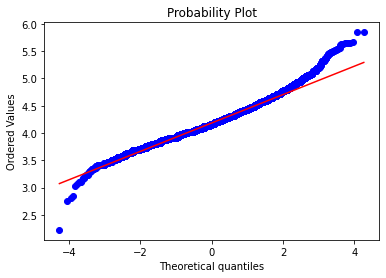

ap_hi


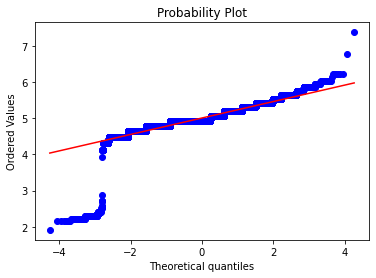

ap_lo


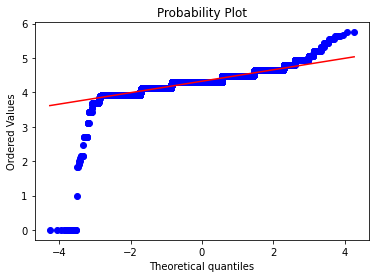

In [125]:
for i in l:
    print(i)
    scipy.stats.probplot((df[i]**(1/3)),dist="norm",plot=pylab)
    df[i]=df[i]**(1/3)
    #sns.distplot(df[i])
    plt.show()

# Using The Filter method For feature selection 

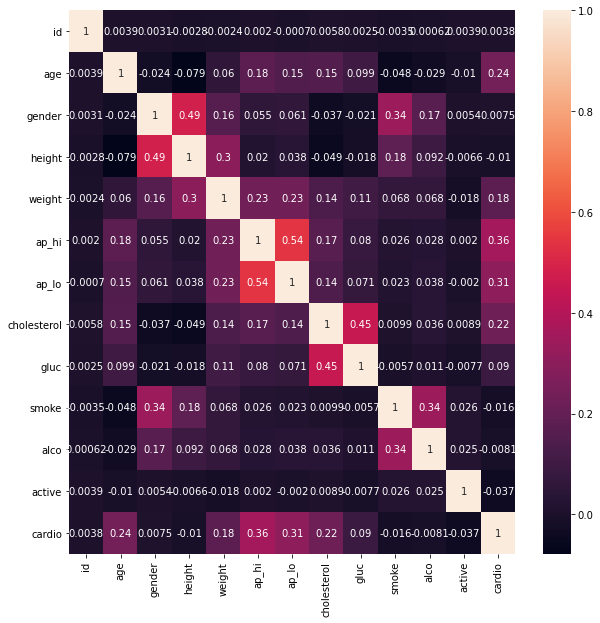

In [126]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [127]:
#dropping coulns id:Used to uniquely identify each and every record in the database has got nothing to do with the disease,Height:Being a continious variable still has a very less corelationtion 
x=df.drop(columns=["id","height"])
y=df.iloc[:,-1]

# Scaling & Onehot encoding 

In [128]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
oh=make_column_transformer(
    (OneHotEncoder(categories='auto'), [1]), 
    remainder="passthrough")
x=oh.fit_transform(x)

In [129]:
#though the columns more or less follow the normal distribution curve but they may not follow the ideal bell shaped curve ....ie mean=0 and std=1 so inorder to achieve this condition standard scalar is used (Column may follow the bell_shaped curve but its mean may not be =0 ie diffrent columns may have different range of values so inorder to bring thenm on even grounds this is done) )
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [130]:
#splitting the data set into train and test with test_size=30%
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=.3)

# Logistic Regression

In [131]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [132]:
#Cardiovascular Dataset using logistic Regression on train set
log_train=lg.score(x_train,y_train)*100

In [133]:
#Cardiovascular Dataset using logistic Regression on test set
log_test=lg.score(x_test,y_test)*100

In [134]:
#confusion matrix of prediction obtainned using Logistic
from sklearn.metrics import confusion_matrix
p_test_1=lg.predict(x_test)
confusion_matrix(y_test,p_test_1,labels=[0,1])

array([[10488,     0],
       [    0, 10215]])

In [135]:
y_pred_log=lg.predict(x_test)

# Kth Nearest Neighbour

In [136]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(11,algorithm='kd_tree')
kn.fit(x_train,y_train)
kn.score(x_train,y_train)*100

99.93168550490623

In [137]:
#KNN score on Test
kn.score(x_test,y_test)*100

99.89856542530067

In [138]:
#KNN confusion matrix
y_pred_KNN=kn.predict(x_test)
confusion_matrix(y_test,y_pred_KNN,labels=[0,1])

array([[10474,    14],
       [    7, 10208]])

# Decision Tree

In [139]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [140]:
from sklearn.metrics import confusion_matrix
print(clf.score(x_test,y_test)*100)
y_pred_Decision=clf.predict(x_test)
confusion_matrix(y_test,y_pred_Decision,labels=[0,1])

100.0


array([[10488,     0],
       [    0, 10215]])

In [141]:
Model_Decision_eval=precision_recall_fscore_support(y_test,p_test_1)

# XG-Boost

In [142]:
import xgboost as xgb
xg_model=xgb.XGBClassifier()
xg_model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [143]:
y_pred_xg=xg_model.predict(x_test)*100

In [144]:
xg_model.score(x_train,y_train)*100

100.0

In [145]:
print(xg_model.score(x_test,y_test)*100)
p_test_1=xg_model.predict(x_test)
confusion_matrix(y_test,p_test_1,labels=[0,1])

100.0


array([[10488,     0],
       [    0, 10215]])

In [146]:
Model_XG_eval=precision_recall_fscore_support(y_test,p_test_1)

# Model evaluation & Results

In [147]:
'''Model Evaluation results '''

'Model Evaluation results '

In [148]:
l_train=[lg.score(x_train,y_train),kn.score(x_train,y_train),clf.score(x_train,y_train),xg_model.score(x_train,y_train)]

In [149]:
l_test=[lg.score(x_test,y_test),kn.score(x_test,y_test),clf.score(x_test,y_test),xg_model.score(x_test,y_test)]

In [150]:
pd.DataFrame({"Train":np.array(l_train)*100,"Test":np.array(l_test)*100},index=["Logistic Regression","KNN","Decision_Tree","XG_Boost"])

,Train,Test
Logistic Regression,100.000000,100.000000
KNN,99.931686,99.898565
Decision_Tree,100.000000,100.000000
XG_Boost,100.000000,100.000000


In [151]:
'''Logistic Regression'''

'Logistic Regression'

In [152]:
print(classification_report(y_test,y_pred_log,target_names=['class 0','class 1']))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     10488
     class 1       1.00      1.00      1.00     10215

    accuracy                           1.00     20703
   macro avg       1.00      1.00      1.00     20703
weighted avg       1.00      1.00      1.00     20703



In [153]:
'''KNN'''

'KNN'

In [154]:
print(classification_report(y_test,y_pred_KNN))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10488
           1       1.00      1.00      1.00     10215

    accuracy                           1.00     20703
   macro avg       1.00      1.00      1.00     20703
weighted avg       1.00      1.00      1.00     20703



In [155]:
'''Decision Tree'''

'Decision Tree'

In [156]:
print(classification_report(y_test,y_pred_Decision,target_names=['class 0','class 1']))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     10488
     class 1       1.00      1.00      1.00     10215

    accuracy                           1.00     20703
   macro avg       1.00      1.00      1.00     20703
weighted avg       1.00      1.00      1.00     20703



In [157]:
'''XG_BOOST'''

'XG_BOOST'

In [158]:
print(classification_report(y_test,y_pred_xg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10488
           1       0.00      0.00      0.00     10215
         100       0.00      0.00      0.00         0

    accuracy                           0.51     20703
   macro avg       0.33      0.33      0.33     20703
weighted avg       0.51      0.51      0.51     20703



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
